In [1]:
!pip install keras

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras import backend as k
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop



Using TensorFlow backend.


In [0]:
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['sign_mnist_train.csv'].decode('utf-8')))

In [6]:
data.shape

(27455, 785)

In [7]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [0]:
df=data.drop(labels=['label'],axis=1)

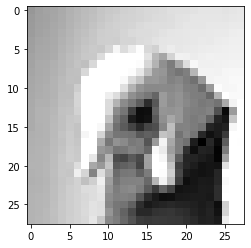

In [33]:
def gen_image(image):
    """Return 28x28 image given grayscale values"""
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
gen_image(np.array(df.iloc[5]))

In [8]:
data.iloc[3,1:].values.reshape(28,28).astype('uint8')

array([[211, 211, 212, 212, 211, 210, 211, 210, 210, 211, 209, 207, 208,
        207, 206, 203, 202, 201, 200, 198, 197, 195, 192, 197, 171,  51,
         52,  54],
       [212, 213, 215, 215, 212, 212, 213, 212, 212, 211, 211, 209, 208,
        209, 206, 204, 203, 202, 201, 200, 199, 197, 193, 204, 149,  44,
         49,  46],
       [215, 217, 218, 217, 216, 216, 217, 214, 213, 212, 212, 211, 210,
        211, 208, 206, 206, 204, 204, 202, 202, 200, 194, 205, 120,  52,
         41,  45],
       [218, 218, 218, 218, 218, 218, 218, 216, 216, 215, 213, 212, 213,
        211, 209, 208, 209, 208, 208, 208, 207, 202, 198, 201,  90,  46,
         44,  34],
       [219, 218, 220, 221, 220, 220, 218, 217, 219, 217, 215, 214, 214,
        211, 201, 187, 186, 182, 179, 183, 192, 204, 204, 196,  63,  56,
         49,  36],
       [221, 221, 221, 222, 222, 222, 220, 220, 219, 218, 217, 214, 213,
        212, 198, 193, 186, 178, 164, 150, 144, 153, 192, 203,  79,  51,
         35,  33],
       [22

In [0]:
df_x=data.iloc[:,1:].values.reshape(len(data),28,28,1)
y=data.iloc[:,0].values

In [0]:
df_y= keras.utils.to_categorical(y,num_classes=25)

In [0]:
df_x=np.array(df_x)
df_y=np.array(df_y)

In [12]:
df_x.shape

(27455, 28, 28, 1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(df_x)

In [0]:
df_x=df_x/255.0

In [0]:
Xtrain,Xtest,ytrain,ytest=train_test_split(df_x,df_y,test_size=0.4,random_state=np.random)

In [0]:
model = Sequential()

model.add(Convolution2D(filters = 16, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Convolution2D(filters = 16, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Convolution2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Convolution2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(25, activation = "softmax"))
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)         

In [18]:
history=model.fit(Xtrain,ytrain,validation_data=(Xtest,ytest), epochs=30, batch_size=128)

Train on 16473 samples, validate on 10982 samples
Epoch 1/30
16473/16473 [==============================] - 9s 529us/step - loss: 2.0660 - accuracy: 0.3702 - val_loss: 0.6620 - val_accuracy: 0.8111
Epoch 2/30
16473/16473 [==============================] - 2s 132us/step - loss: 0.6340 - accuracy: 0.7895 - val_loss: 0.1174 - val_accuracy: 0.9744
Epoch 3/30
16473/16473 [==============================] - 2s 131us/step - loss: 0.2564 - accuracy: 0.9131 - val_loss: 0.0333 - val_accuracy: 0.9946
Epoch 4/30
16473/16473 [==============================] - 2s 133us/step - loss: 0.1392 - accuracy: 0.9533 - val_loss: 0.0193 - val_accuracy: 0.9947
Epoch 5/30
16473/16473 [==============================] - 2s 132us/step - loss: 0.0821 - accuracy: 0.9726 - val_loss: 0.0082 - val_accuracy: 0.9981
Epoch 6/30
16473/16473 [==============================] - 2s 131us/step - loss: 0.0622 - accuracy: 0.9785 - val_loss: 0.0033 - val_accuracy: 0.9998
Epoch 7/30
16473/16473 [==============================] - 2s 1

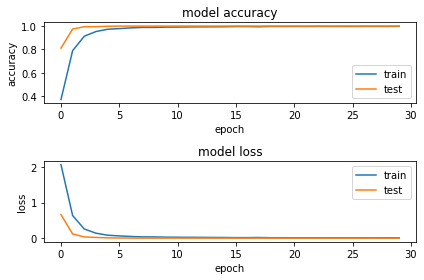

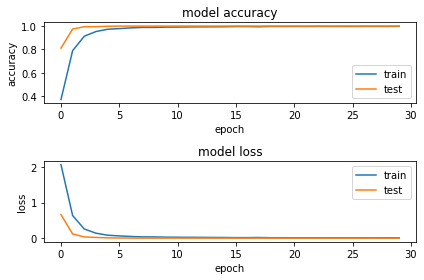

In [19]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [20]:
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


In [0]:

test = pd.read_csv(io.StringIO(uploaded['sign_mnist_test.csv'].decode('utf-8')))

In [0]:
Xtest=test.drop(labels=['label'], axis=1)
Y=test['label']

In [0]:
Ytest= keras.utils.to_categorical(Y,num_classes=25)
Ytest=np.array(Ytest)



In [27]:
test.iloc[3,1:].values.reshape(28,28).astype('uint8')

array([[203, 205, 207, 206, 207, 209, 210, 209, 210, 209, 208, 207, 207,
        209, 208, 210, 210, 207, 209, 209, 208, 209, 210, 209, 207, 208,
        209, 207],
       [206, 208, 209, 208, 208, 210, 211, 210, 211, 209, 209, 210, 211,
        211, 209, 208, 211, 215, 210, 212, 212, 211, 211, 210, 210, 211,
        210, 210],
       [209, 209, 210, 211, 210, 210, 212, 212, 211, 212, 210, 210, 212,
        211, 223, 208, 162, 176, 219, 204, 206, 217, 216, 214, 212, 209,
        211, 212],
       [209, 210, 211, 213, 215, 213, 211, 213, 213, 211, 216, 216, 179,
        167, 228, 202, 161, 129, 132, 155, 141, 187, 210, 159, 197, 217,
        211, 211],
       [210, 211, 211, 213, 214, 213, 213, 214, 215, 216, 245, 228, 181,
        138, 184, 210, 175, 160,  76, 133, 143, 118, 180, 126, 170, 225,
        211, 214],
       [210, 212, 213, 213, 213, 215, 213, 221, 198, 181, 245, 225, 192,
        156, 176, 234, 181, 168,  95, 158, 159, 121, 145, 134, 161, 228,
        214, 216],
       [21

In [0]:
x=test.iloc[:,1:].values.reshape(len(test),28,28,1)
Xtest=np.array(x)
Xtest=Xtest/255.0

In [29]:
model.evaluate(Xtest,Ytest)

7172/7172 [==============================] - 1s 150us/step


[0.22371952159269443, 0.9631901979446411]